In [1]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import pathlib
import os
import re
from keras_preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import datetime
from matplotlib import pyplot


In [2]:
def return_names(root_dir,str1):
    data_root = pathlib.Path(root_dir)
    print("root is",data_root)
    all_pics_path=list(data_root.glob("**/*."+ str1))
    all_pics_path=[str(path) for path in all_pics_path]
    dict1={str1: all_pics_path}

    data_df=pd.DataFrame(dict1)
    return data_df

In [3]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2013\\Challenge2_Training_Task12_Images\\'
icdar_2013=return_names(rdir,'JPG')


root is C:\Users\Abhi\Desktop\CS2\icdar2013\Challenge2_Training_Task12_Images


In [4]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2013\\Challenge2_Test_Task12_Images\\'
icdar_2013_test=return_names(rdir,'JPG')

root is C:\Users\Abhi\Desktop\CS2\icdar2013\Challenge2_Test_Task12_Images


# ICDAR 2013

no of images in training set 229
no of images in test set 233
(480, 640, 3)
(480, 640, 3)


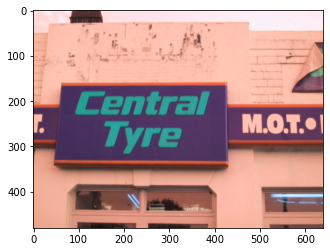

In [5]:
print('no of images in training set',icdar_2013.shape[0] )
print('no of images in test set',icdar_2013_test.shape[0] )
img=cv2.imread(icdar_2013['JPG'][21])
img1=cv2.imread(icdar_2013_test['JPG'][21])
print(img1.shape)
print(img.shape)
pyplot.imshow(img)

In [6]:
list1=[]
for i in range(icdar_2013.shape[0]):
    img=cv2.imread(icdar_2013['JPG'][i])
    list1.append((img.shape))


In [50]:
list1                    # varying image shape

[(480, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (640, 480, 3),
 (1280, 960, 3),
 (480, 640, 3),
 (480, 640, 3),
 (611, 1019, 3),
 (2592, 3888, 3),
 (301, 640, 3),
 (480, 640, 3),
 (960, 1280, 3),
 (480, 640, 3),
 (960, 1280, 3),
 (2592, 3888, 3),
 (480, 640, 3),
 (480, 640, 3),
 (466, 640, 3),
 (2592, 3888, 3),
 (960, 1280, 3),
 (480, 640, 3),
 (480, 640, 3),
 (2592, 3888, 3),
 (480, 640, 3),
 (480, 640, 3),
 (1200, 1600, 3),
 (1200, 1600, 3),
 (1200, 1600, 3),
 (2592, 3888, 3),
 (1200, 1600, 3),
 (480, 640, 3),
 (2592, 3888, 3),
 (480, 640, 3),
 (1200, 1600, 3),
 (480, 640, 3),
 (640, 480, 3),
 (480, 640, 3),
 (960, 1280, 3),
 (480, 640, 3),
 (3888, 2592, 3),
 (480, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (2592, 3888, 3),
 (480, 640, 3),
 (480, 640, 3),
 (960, 1280, 3),
 (755, 627, 3),
 (480, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (1200, 1600, 3),
 (2592, 3888, 3),
 (480, 640, 3),
 (480, 640, 3),
 (1280, 960, 3),
 (387, 587, 3),
 (480, 640, 3),
 (480, 640, 3),
 (

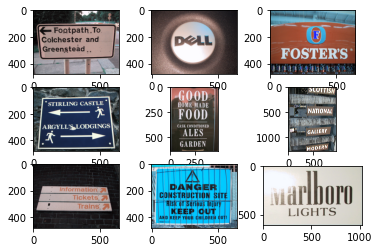

In [16]:
for i in range(9):
                                                                       #training images
    pyplot.subplot(330 + 1 + i)
    img=cv2.imread(icdar_2013['JPG'][i])
    pyplot.imshow(img)

pyplot.show()


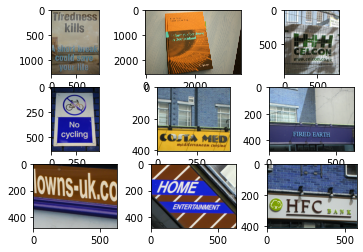

In [20]:
for i in range(9):

    pyplot.subplot(330 + 1 + i)                                         #test images
    img=cv2.imread(icdar_2013_test['JPG'][i])
    pyplot.imshow(img)

pyplot.show()

#Blurred image

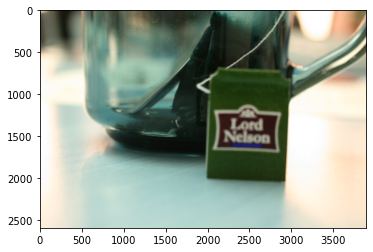

In [36]:
img=cv2.imread('C:\\Users\\Abhi\Desktop\\CS2\\icdar2013\\Challenge2_Test_Task12_Images\\img_16.jpg')
pyplot.imshow(img)

#Flashlight images

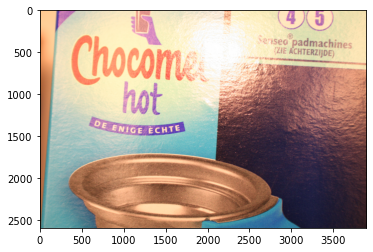

In [37]:
img=cv2.imread('C:\\Users\\Abhi\Desktop\\CS2\\icdar2013\\Challenge2_Test_Task12_Images\\img_27.jpg')
pyplot.imshow(img)

#Ground truth

In [8]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2013\\Challenge2_Training_Task1_GT\\'
icdar_2013_gt=return_names(rdir,'txt')

root is C:\Users\Abhi\Desktop\CS2\icdar2013\Challenge2_Training_Task1_GT


In [15]:
f = open(icdar_2013_gt['txt'][0], "r")
count=0
for i in f.readlines():
    print(i.split()[-1].replace(" ",'')[1:-1])
    if count>20:
        break
    count+=1
   
# img=cv2.imread(icdar_2013['JPG'][0])

# pyplot.imshow(img)

Footpath
To
Colchester
and
Greenstead


# Observations

#Icdar 2013 dataset contains mostly horizontal alligned datasets for focused text detection 
#training set contains 229 images, test set cotains 233 images
#shape of each images are varying 
#contains some blurred and flash lit images
#Ground truth :-top ,left,right,bottom transcription 

# ICDAR 2017

In [38]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2017\\ch8_training_images'
icdar_2017=return_names(rdir,'JPG')
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2017\\ch8_validation_images\\'
icdar_2017_test=return_names(rdir,'JPG')

root is C:\Users\Abhi\Desktop\CS2\icdar2017\ch8_training_images
root is C:\Users\Abhi\Desktop\CS2\icdar2017\ch8_validation_images


no of images in training set 7167
no of images in test set 1799
(639, 710, 3)
(2448, 1836, 3)


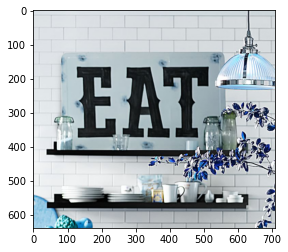

In [43]:
print('no of images in training set',icdar_2017.shape[0] )
print('no of images in test set',icdar_2017_test.shape[0] )
img=cv2.imread(icdar_2017['JPG'][21])
img1=cv2.imread(icdar_2017_test['JPG'][21])
print(img.shape)
print(img1.shape)
pyplot.imshow(img)

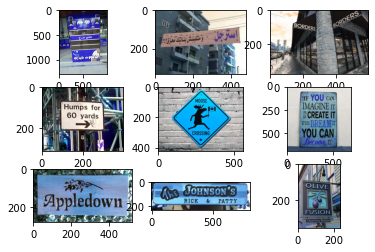

In [41]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    img=cv2.imread(icdar_2017['JPG'][i])                               #training images
    pyplot.imshow(img)

pyplot.show()


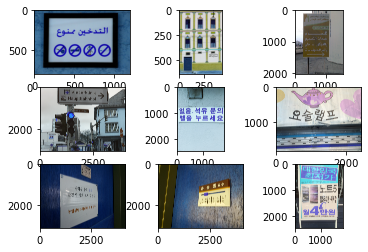

In [42]:
for i in range(9):

    pyplot.subplot(330 + 1 + i)
    img=cv2.imread(icdar_2017_test['JPG'][i])                               #testing images
    pyplot.imshow(img)

pyplot.show()

In [52]:
list1=[]
for i in range(icdar_2017.shape[0]):
    img=cv2.imread(icdar_2017['JPG'][i])
    list1.append((img.shape))
list1

[(1300, 975, 3),
 (336, 480, 3),
 (383, 590, 3),
 (313, 400, 3),
 (423, 564, 3),
 (700, 700, 3),
 (281, 522, 3),
 (230, 800, 3),
 (354, 236, 3),
 (370, 480, 3),
 (760, 570, 3),
 (234, 293, 3),
 (768, 1024, 3),
 (1936, 2592, 3),
 (414, 620, 3),
 (4000, 6016, 3),
 (236, 236, 3),
 (505, 389, 3),
 (236, 236, 3),
 (375, 500, 3),
 (233, 233, 3),
 (639, 710, 3),
 (733, 1100, 3),
 (360, 403, 3),
 (450, 600, 3),
 (833, 625, 3),
 (270, 470, 3),
 (851, 1280, 3),
 (981, 736, 3),
 (451, 600, 3),
 (538, 582, 3),
 (1208, 570, 3),
 (428, 570, 3),
 (266, 400, 3),
 (426, 640, 3),
 (960, 720, 3),
 (450, 600, 3),
 (304, 404, 3),
 (427, 450, 3),
 (743, 992, 3),
 (435, 580, 3),
 (334, 500, 3),
 (250, 250, 3),
 (240, 180, 3),
 (250, 378, 3),
 (640, 960, 3),
 (956, 1200, 3),
 (930, 1280, 3),
 (1288, 966, 3),
 (233, 390, 3),
 (270, 340, 3),
 (270, 340, 3),
 (270, 340, 3),
 (270, 340, 3),
 (270, 340, 3),
 (1125, 1500, 3),
 (341, 474, 3),
 (850, 1280, 3),
 (4032, 3024, 3),
 (3024, 4032, 3),
 (4032, 3024, 3),
 (4

In [56]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2017\\ch8_training_localization_transcription_gt_v2\\'
icdar_2017_gt=return_names(rdir,'txt')

root is C:\Users\Abhi\Desktop\CS2\icdar2017\ch8_training_localization_transcription_gt_v2


197,55,303,40,313,87,201,95,Arabic,فروجنا
55,62,185,57,186,102,54,109,Arabic,المشوى
226,112,305,111,306,157,227,158,Arabic,حلال
193,129,212,128,213,162,194,162,Arabic,و
102,123,180,123,180,173,102,173,Arabic,طازج
28,194,79,193,79,218,28,219,Latin,Halal
86,191,142,191,139,214,84,214,Latin,Flame
149,186,226,182,221,208,148,213,Latin,Grilled
230,182,310,180,310,205,230,205,Latin,Chicken
172,243,208,250,208,265,171,265,Latin,###
107,249,149,248,148,264,124,265,Latin,###



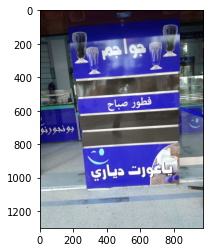

In [60]:
f = open(icdar_2017_gt['txt'][0], "r",encoding='utf-8')
print(f.read())
plt.imshow(cv2.imread(icdar_2017['JPG'][0]))

# Observation

# "###" in ground truth means not care regions
#9 cordinates in gt  x1,y1 x2,y2 and so on and transcriptioin 
#large scale multi-lingual text
#7200 training images, 1800 validation images and 9000 testing images. 
#The dataset is composed of complete scene images which come from 9 languages, and text regions in this dataset can be in arbitrary orientations 
#dataset does not have text spotting task so we only report
#same varying shapes of images as in icdar 2013

# ICDAR 2015

In [11]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2015\\ch4_training_images'
icdar_2015=return_names(rdir,'JPG')
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2015\\ch4_test_images\\'
icdar_2015_test=return_names(rdir,'JPG')

root is C:\Users\Abhi\Desktop\CS2\icdar2015\ch4_training_images
root is C:\Users\Abhi\Desktop\CS2\icdar2015\ch4_test_images


no of images in training set 1000
no of images in test set 500
(720, 1280, 3)
(720, 1280, 3)


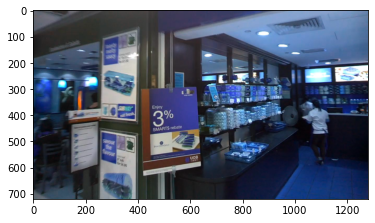

In [63]:
print('no of images in training set',icdar_2015.shape[0] )
print('no of images in test set',icdar_2015_test.shape[0] )
img=cv2.imread(icdar_2015['JPG'][21])
img1=cv2.imread(icdar_2015_test['JPG'][21])
print(img.shape)
print(img1.shape)
pyplot.imshow(img)

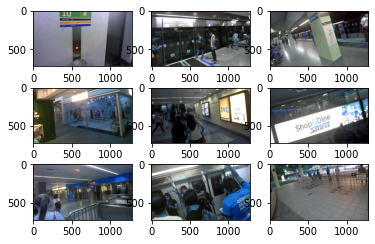

In [64]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    img=cv2.imread(icdar_2015['JPG'][i])                               #training images
    pyplot.imshow(img)

pyplot.show()


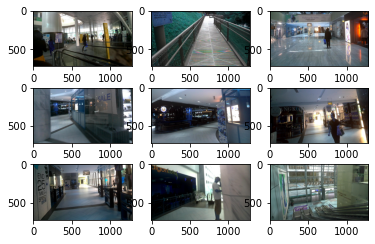

In [65]:
for i in range(9):

    pyplot.subplot(330 + 1 + i)
    img=cv2.imread(icdar_2015_test['JPG'][i])                               #testing images
    pyplot.imshow(img)

pyplot.show()

In [66]:
list1=[]
for i in range(icdar_2015.shape[0]):
    img=cv2.imread(icdar_2015['JPG'][i])
    list1.append((img.shape))
list1

[(720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3

In [67]:
np.unique(list1)

array([   3,  720, 1280])

In [7]:
rdir='C:\\Users\\Abhi\Desktop\\CS2\\icdar2015\\ch4_training_localization_transcription_gt\\'
icdar_2015_gt=return_names(rdir,'txt')

root is C:\Users\Abhi\Desktop\CS2\icdar2015\ch4_training_localization_transcription_gt


['\ufeff377,117,463,117,465,130,378,130,Genaxis Theatre\n', '493,115,519,115,519,131,493,131,[06]\n', '374,155,409,155,409,170,374,170,###\n', '492,151,551,151,551,170,492,170,62-03\n', '376,198,422,198,422,212,376,212,Carpark\n', '494,190,539,189,539,205,494,206,###\n', '374,1,494,0,492,85,372,86,###\n']


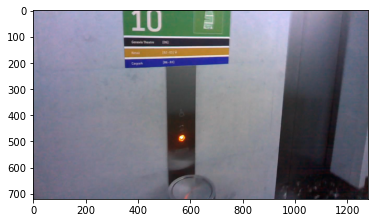

In [12]:
f = open(icdar_2015_gt['txt'][0], "r",encoding='utf-8')
print(f.readlines())
plt.imshow(cv2.imread(icdar_2015['JPG'][0]))

# Observations

# "###" in ground truth means not care regions
#9 cordinates in gt  x1,y1 x2,y2 and so on and transcriptioin 
#This dataset includes 1000 training images and 500 testing images.
#images are captured by Google glasses without taking care
of position, so text in the scene can be in arbitrary orientations.
#All images are of same shape (720,1280,3)
#some images can be blurry


# SynthText800k

In [6]:
rdir='C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText'
synth=return_names(rdir,'JPG')

root is C:\Users\Abhi\Desktop\CS2\SynthText\SynthText


(600, 568, 3)


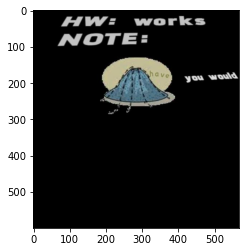

In [5]:
img=cv2.imread(synth['JPG'][21])

print(img.shape)

pyplot.imshow(img)

In [22]:
list1=[]
for i in range(icdar_2015.shape[0]):
    img=cv2.imread(synth['JPG'][i+3])
    list1.append((img.shape))
list1

[(600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 568, 3),
 (600, 5

In [4]:
import scipy.io
mat = scipy.io.loadmat('C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText\\gt.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr 14 23:08:01 2016',
 '__version__': '1.0',
 '__globals__': [],
 'charBB': array([[array([[[423.16126397, 439.60847343, 450.66887979, 466.31976402,
          479.76190495, 504.59927448, 418.80489444, 450.13965942,
          464.16775197, 480.46891089, 502.46437709, 413.02373632,
          433.01396211, 446.7222192 , 470.28467827, 482.51674486,
          116.52285438, 139.51408587, 150.7448586 , 162.03366629,
          322.84717946, 333.54881536, 343.28386485, 363.07416389,
          323.48968759, 337.98503283, 356.66355903, 160.48517048,
          174.1707753 , 189.64454066, 155.7637383 , 167.45490471,
          179.63644201, 262.2183876 , 271.75848874, 284.05396524,
          298.26103738, 432.8464733 , 449.15387392, 468.07231897,
          428.11482147, 445.61538159, 469.24565878, 296.86441324,
          323.6603118 , 344.09880401, 101.14677814, 110.45423597,
          120.54555495, 131.18342618, 132.20545124, 

In [17]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'charBB', 'wordBB', 'imnames', 'txt'])

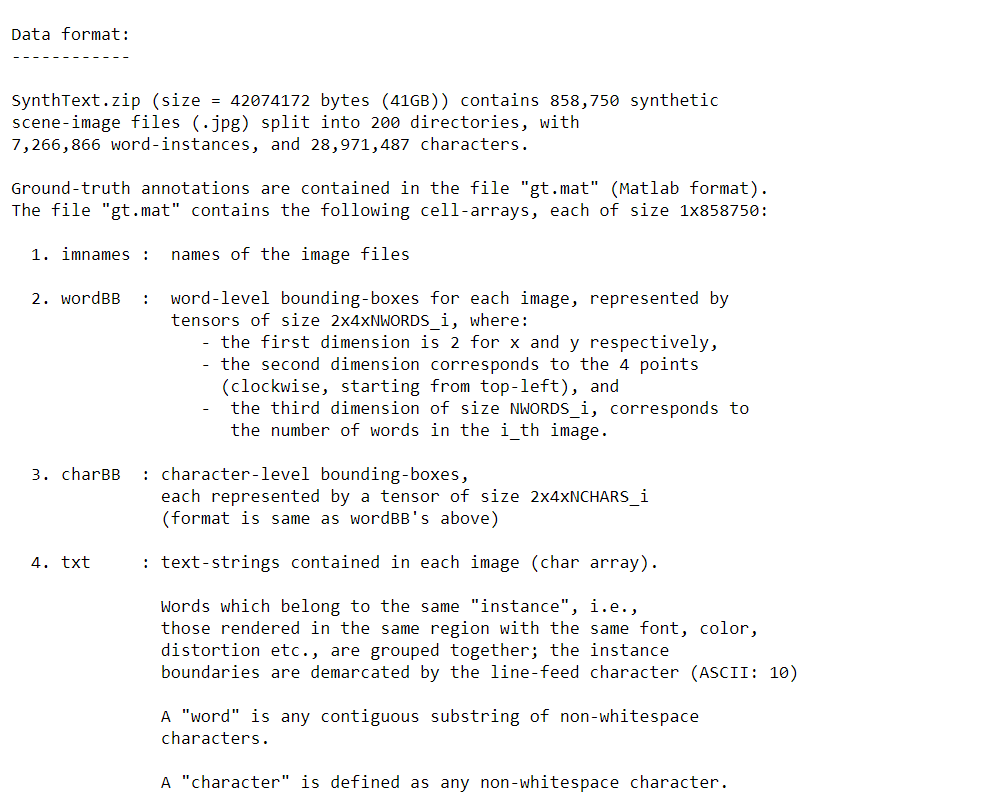

In [18]:
from IPython.display import Image                              #https://www.robots.ox.ac.uk/~vgg/data/scenetext/readme.txt
Image(filename='C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText\\capture.png') 

In [60]:
mat['wordBB'][0][0][0]

array([[420.58957 , 418.85016 , 448.08478 , 410.3094  , 117.745026,
        322.30963 , 322.6857  , 159.09138 , 154.27284 , 260.14597 ,
        431.9315  , 427.52274 , 296.86508 ,  99.56819 , 108.96211 ],
       [512.3321  , 431.88342 , 519.4515  , 499.81183 , 179.0544  ,
        377.97382 , 376.4993  , 203.64464 , 193.77492 , 313.61514 ,
        487.58023 , 484.64633 , 365.83176 , 142.49403 , 144.90457 ],
       [511.92203 , 428.7077  , 518.7375  , 499.0373  , 172.1684  ,
        378.35858 , 377.2078  , 203.3191  , 193.0739  , 319.69186 ,
        485.6758  , 482.571   , 365.76303 , 142.31898 , 144.43858 ],
       [420.1795  , 415.67444 , 447.3708  , 409.53485 , 110.859024,
        322.6944  , 323.3942  , 158.76585 , 153.57182 , 266.2227  ,
        430.02707 , 425.44742 , 296.79636 ,  99.39314 , 108.49613 ]],
      dtype=float32)

In [63]:
mat['wordBB'][0][0][1]

array([[ 21.06382  ,  46.19922  ,  47.570374 ,  73.95366  , 197.17792  ,
          9.993624 ,  48.437763 ,   9.064571 ,  49.659035 , 208.57095  ,
        118.41646  , 162.82489  ,  29.548729 ,   5.800581 ,  28.812992 ],
       [ 23.069519 ,  48.254295 ,  50.130234 ,  77.18146  , 208.71487  ,
          8.999153 ,  46.69632  ,   9.698633 ,  50.869553 , 203.25742  ,
        122.64043  , 168.38647  ,  29.660484 ,   6.2558594,  29.602367 ],
       [ 41.827087 ,  68.39458  ,  70.03627  ,  98.65903  , 245.30832  ,
         30.534437 ,  68.589294 ,  32.57161  ,  73.74529  , 264.40634  ,
        147.7303   , 189.70224  ,  72.08     ,  22.759935 ,  50.81941  ],
       [ 39.82139  ,  66.3395   ,  67.47641  ,  95.43123  , 233.77136  ,
         31.528908 ,  70.33074  ,  31.937548 ,  72.534775 , 269.71988  ,
        143.50633  , 184.14066  ,  71.96825  ,  22.304657 ,  50.030033 ]],
      dtype=float32)

In [26]:
mat['wordBB'][0][0].shape

(2, 4, 15)

In [8]:
mat['wordBB'][0].shape

(858750,)

In [41]:
mat['wordBB'][0][0].shape

(2, 4, 15)

In [22]:
mat['wordBB'][0][1].shape

(2, 4, 13)

In [18]:
mat['wordBB'][0][0][0].shape

(4, 15)

In [17]:
mat['wordBB'][0][0][0][3]

array([420.1795  , 415.67444 , 447.3708  , 409.53485 , 110.859024,
       322.6944  , 323.3942  , 158.76585 , 153.57182 , 266.2227  ,
       430.02707 , 425.44742 , 296.79636 ,  99.39314 , 108.49613 ],
      dtype=float32)

In [21]:
mat['wordBB'][0][0][1].shape

(4, 15)

In [36]:
mat['wordBB'][0][0][1][3]

array([ 39.82139 ,  66.3395  ,  67.47641 ,  95.43123 , 233.77136 ,
        31.528908,  70.33074 ,  31.937548,  72.534775, 269.71988 ,
       143.50633 , 184.14066 ,  71.96825 ,  22.304657,  50.030033],
      dtype=float32)

In [13]:
mat['txt'][0][5]

array(['Date: \nLines:', 'Date:        ', 'Got a\ndid a  ',
       'YOU          ', 'the          ', 'the\nFrom:    ',
       'the          ', 'and          '], dtype='<U13')

In [17]:
mat['imnames'][0][0][0]

'8/ballet_106_0.jpg'

In [31]:
for i in mat['imnames'][0][:]:

    if synth['JPG'][10].split('\\')[-1] in i[0].split('/'):
        print(i)


['1/ant+hill_100_104.jpg']


In [27]:
synth['JPG'][10]

'C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText\\1\\ant+hill_100_104.jpg'

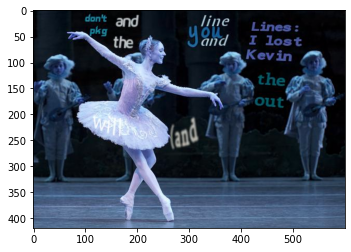

In [19]:
plt.imshow(cv2.imread('C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText\\8\\ballet_106_0.jpg'))

#synth text contains images which are imbedded with texts for eg image above

# USAGE OF DATA SETS

#SYnth800k data set can be used for training as it contains word level bbox as well as charlevel bbox
#then we can use other icdar datasets which contains more real images of the world ie in a natural setting

In [89]:
 mat['wordBB'][0][3][0].shape

(4, 8)

In [34]:
mat['imnames'][0][2]

array(['8/ballet_106_10.jpg'], dtype='<U19')

In [ ]:
# for i in range(mat['wordBB'][0][0].shape[0]):
#     print(mat['wordBB'][0][0][i].shape)
#     print(mat['wordBB'][0][0][i+1].shape)
list3=[]
list4=[]
for j in range(mat['wordBB'][0].shape[0]):
    list2=[]
    
    if len(mat['wordBB'][0][j].shape) !=3:
        continue
    for i in range(mat['wordBB'][0][j][0][0].shape[0]):
        
        list1=[]
        list1.append((mat['wordBB'][0][j][0][0][i], mat['wordBB'][0][j][1][0][i]))
        list1.append((mat['wordBB'][0][j][0][1][i], mat['wordBB'][0][j][1][1][i]))
        list1.append((mat['wordBB'][0][j][0][2][i], mat['wordBB'][0][j][1][2][i]))
        list1.append((mat['wordBB'][0][j][0][3][i], mat['wordBB'][0][j][1][3][i]))
        list2.append(list1) 
    for k in range(synth['JPG'].shape[0]):
        if mat['imnames'][0][j][0].split('/')[1] in synth['JPG'][k].split('//')[-1]:
            list4.append(synth['JPG'][k])
    list3.append(list2)
len(list3)

In [ ]:
len(list3)

In [ ]:
len(list4)

In [38]:

# # read data / path to gt.mat
dataset = scipy.io.loadmat('C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\SynthText\\gt.mat')

# 1. paths to imgs
img_paths = [i[0] for i in dataset['imnames'][0, :]]
with open('synthtext/path_to_imgs.txt', 'w') as f:
    for item in img_paths:
        f.write("%s\n" % item)

# 2. word list
dataset_word_list = []
for img_words in dataset['txt'][0, :]:
    img_word_list = []
    for words in img_words:
        for word in [item for sublist in [i.strip().split(' ') for i in words.split('\n')] for item in sublist]:
            if word != '':
                img_word_list.append(word)
    dataset_word_list.append(img_word_list)

# 3. polys and words
iter = 0
for polys, words, img_path in zip(dataset['wordBB'][0, :], dataset_word_list, img_paths):

    # fix poly
    if len(polys.shape) == 2:
        polys = polys[:, :, np.newaxis]
    polys = polys.transpose([-1, 0, 1])

    # check if all match up
    if polys.shape[0] != len(words):
        print('number of polys and words do not mathc')
        break

    # write file
    with open('synthtext/annotation/{}.txt'.format(img_path.split('/')[1].split('.')[0]), 'w') as f:
        for poly, word in zip(polys, words):
            line = np.around(poly, 1).ravel()
            line = np.concatenate([line, [word]], axis=0)
            for item in line:
                f.write("%s " % item)
            f.write("\n")

    iter += 1
    if iter % 100 == 0:
        print(iter, 'out of', len(img_paths))

100 out of 858750
200 out of 858750
300 out of 858750
400 out of 858750
500 out of 858750
600 out of 858750
700 out of 858750
800 out of 858750
900 out of 858750
1000 out of 858750
1100 out of 858750
1200 out of 858750
1300 out of 858750
1400 out of 858750
1500 out of 858750
1600 out of 858750
1700 out of 858750
1800 out of 858750
1900 out of 858750
2000 out of 858750
2100 out of 858750
2200 out of 858750
2300 out of 858750
2400 out of 858750
2500 out of 858750
2600 out of 858750
2700 out of 858750
2800 out of 858750
2900 out of 858750
3000 out of 858750
3100 out of 858750
3200 out of 858750
3300 out of 858750
3400 out of 858750
3500 out of 858750
3600 out of 858750
3700 out of 858750
3800 out of 858750
3900 out of 858750
4000 out of 858750
4100 out of 858750
4200 out of 858750
4300 out of 858750
4400 out of 858750
4500 out of 858750
4600 out of 858750
4700 out of 858750
4800 out of 858750
4900 out of 858750
5000 out of 858750
5100 out of 858750
5200 out of 858750
5300 out of 858750
54

41700 out of 858750
41800 out of 858750
41900 out of 858750
42000 out of 858750
42100 out of 858750
42200 out of 858750
42300 out of 858750
42400 out of 858750
42500 out of 858750
42600 out of 858750
42700 out of 858750
42800 out of 858750
42900 out of 858750
43000 out of 858750
43100 out of 858750
43200 out of 858750
43300 out of 858750
43400 out of 858750
43500 out of 858750
43600 out of 858750
43700 out of 858750
43800 out of 858750
43900 out of 858750
44000 out of 858750
44100 out of 858750
44200 out of 858750
44300 out of 858750
44400 out of 858750
44500 out of 858750
44600 out of 858750
44700 out of 858750
44800 out of 858750
44900 out of 858750
45000 out of 858750
45100 out of 858750
45200 out of 858750
45300 out of 858750
45400 out of 858750
45500 out of 858750
45600 out of 858750
45700 out of 858750
45800 out of 858750
45900 out of 858750
46000 out of 858750
46100 out of 858750
46200 out of 858750
46300 out of 858750
46400 out of 858750
46500 out of 858750
46600 out of 858750


82700 out of 858750
82800 out of 858750
82900 out of 858750
83000 out of 858750
83100 out of 858750
83200 out of 858750
83300 out of 858750
83400 out of 858750
83500 out of 858750
83600 out of 858750
83700 out of 858750
83800 out of 858750
83900 out of 858750
84000 out of 858750
84100 out of 858750
84200 out of 858750
84300 out of 858750
84400 out of 858750
84500 out of 858750
84600 out of 858750
84700 out of 858750
84800 out of 858750
84900 out of 858750
85000 out of 858750
85100 out of 858750
85200 out of 858750
85300 out of 858750
85400 out of 858750
85500 out of 858750
85600 out of 858750
85700 out of 858750
85800 out of 858750
85900 out of 858750
86000 out of 858750
86100 out of 858750
86200 out of 858750
86300 out of 858750
86400 out of 858750
86500 out of 858750
86600 out of 858750
86700 out of 858750
86800 out of 858750
86900 out of 858750
87000 out of 858750
87100 out of 858750
87200 out of 858750
87300 out of 858750
87400 out of 858750
87500 out of 858750
87600 out of 858750


122600 out of 858750
122700 out of 858750
122800 out of 858750
122900 out of 858750
123000 out of 858750
123100 out of 858750
123200 out of 858750
123300 out of 858750
123400 out of 858750
123500 out of 858750
123600 out of 858750
123700 out of 858750
123800 out of 858750
123900 out of 858750
124000 out of 858750
124100 out of 858750
124200 out of 858750
124300 out of 858750
124400 out of 858750
124500 out of 858750
124600 out of 858750
124700 out of 858750
124800 out of 858750
124900 out of 858750
125000 out of 858750
125100 out of 858750
125200 out of 858750
125300 out of 858750
125400 out of 858750
125500 out of 858750
125600 out of 858750
125700 out of 858750
125800 out of 858750
125900 out of 858750
126000 out of 858750
126100 out of 858750
126200 out of 858750
126300 out of 858750
126400 out of 858750
126500 out of 858750
126600 out of 858750
126700 out of 858750
126800 out of 858750
126900 out of 858750
127000 out of 858750
127100 out of 858750
127200 out of 858750
127300 out of

162000 out of 858750
162100 out of 858750
162200 out of 858750
162300 out of 858750
162400 out of 858750
162500 out of 858750
162600 out of 858750
162700 out of 858750
162800 out of 858750
162900 out of 858750
163000 out of 858750
163100 out of 858750
163200 out of 858750
163300 out of 858750
163400 out of 858750
163500 out of 858750
163600 out of 858750
163700 out of 858750
163800 out of 858750
163900 out of 858750
164000 out of 858750
164100 out of 858750
164200 out of 858750
164300 out of 858750
164400 out of 858750
164500 out of 858750
164600 out of 858750
164700 out of 858750
164800 out of 858750
164900 out of 858750
165000 out of 858750
165100 out of 858750
165200 out of 858750
165300 out of 858750
165400 out of 858750
165500 out of 858750
165600 out of 858750
165700 out of 858750
165800 out of 858750
165900 out of 858750
166000 out of 858750
166100 out of 858750
166200 out of 858750
166300 out of 858750
166400 out of 858750
166500 out of 858750
166600 out of 858750
166700 out of

201300 out of 858750
201400 out of 858750
201500 out of 858750
201600 out of 858750
201700 out of 858750
201800 out of 858750
201900 out of 858750
202000 out of 858750
202100 out of 858750
202200 out of 858750
202300 out of 858750
202400 out of 858750
202500 out of 858750
202600 out of 858750
202700 out of 858750
202800 out of 858750
202900 out of 858750
203000 out of 858750
203100 out of 858750
203200 out of 858750
203300 out of 858750
203400 out of 858750
203500 out of 858750
203600 out of 858750
203700 out of 858750
203800 out of 858750
203900 out of 858750
204000 out of 858750
204100 out of 858750
204200 out of 858750
204300 out of 858750
204400 out of 858750
204500 out of 858750
204600 out of 858750
204700 out of 858750
204800 out of 858750
204900 out of 858750
205000 out of 858750
205100 out of 858750
205200 out of 858750
205300 out of 858750
205400 out of 858750
205500 out of 858750
205600 out of 858750
205700 out of 858750
205800 out of 858750
205900 out of 858750
206000 out of

240400 out of 858750
240500 out of 858750
240600 out of 858750
240700 out of 858750
240800 out of 858750
240900 out of 858750
241000 out of 858750
241100 out of 858750
241200 out of 858750
241300 out of 858750
241400 out of 858750
241500 out of 858750
241600 out of 858750
241700 out of 858750
241800 out of 858750
241900 out of 858750
242000 out of 858750
242100 out of 858750
242200 out of 858750
242300 out of 858750
242400 out of 858750
242500 out of 858750
242600 out of 858750
242700 out of 858750
242800 out of 858750
242900 out of 858750
243000 out of 858750
243100 out of 858750
243200 out of 858750
243300 out of 858750
243400 out of 858750
243500 out of 858750
243600 out of 858750
243700 out of 858750
243800 out of 858750
243900 out of 858750
244000 out of 858750
244100 out of 858750
244200 out of 858750
244300 out of 858750
244400 out of 858750
244500 out of 858750
244600 out of 858750
244700 out of 858750
244800 out of 858750
244900 out of 858750
245000 out of 858750
245100 out of

279500 out of 858750
279600 out of 858750
279700 out of 858750
279800 out of 858750
279900 out of 858750
280000 out of 858750
280100 out of 858750
280200 out of 858750
280300 out of 858750
280400 out of 858750
280500 out of 858750
280600 out of 858750
280700 out of 858750
280800 out of 858750
280900 out of 858750
281000 out of 858750
281100 out of 858750
281200 out of 858750
281300 out of 858750
281400 out of 858750
281500 out of 858750
281600 out of 858750
281700 out of 858750
281800 out of 858750
281900 out of 858750
282000 out of 858750
282100 out of 858750
282200 out of 858750
282300 out of 858750
282400 out of 858750
282500 out of 858750
282600 out of 858750
282700 out of 858750
282800 out of 858750
282900 out of 858750
283000 out of 858750
283100 out of 858750
283200 out of 858750
283300 out of 858750
283400 out of 858750
283500 out of 858750
283600 out of 858750
283700 out of 858750
283800 out of 858750
283900 out of 858750
284000 out of 858750
284100 out of 858750
284200 out of

318800 out of 858750
318900 out of 858750
319000 out of 858750
319100 out of 858750
319200 out of 858750
319300 out of 858750
319400 out of 858750
319500 out of 858750
319600 out of 858750
319700 out of 858750
319800 out of 858750
319900 out of 858750
320000 out of 858750
320100 out of 858750
320200 out of 858750
320300 out of 858750
320400 out of 858750
320500 out of 858750
320600 out of 858750
320700 out of 858750
320800 out of 858750
320900 out of 858750
321000 out of 858750
321100 out of 858750
321200 out of 858750
321300 out of 858750
321400 out of 858750
321500 out of 858750
321600 out of 858750
321700 out of 858750
321800 out of 858750
321900 out of 858750
322000 out of 858750
322100 out of 858750
322200 out of 858750
322300 out of 858750
322400 out of 858750
322500 out of 858750
322600 out of 858750
322700 out of 858750
322800 out of 858750
322900 out of 858750
323000 out of 858750
323100 out of 858750
323200 out of 858750
323300 out of 858750
323400 out of 858750
323500 out of

358000 out of 858750
358100 out of 858750
358200 out of 858750
358300 out of 858750
358400 out of 858750
358500 out of 858750
358600 out of 858750
358700 out of 858750
358800 out of 858750
358900 out of 858750
359000 out of 858750
359100 out of 858750
359200 out of 858750
359300 out of 858750
359400 out of 858750
359500 out of 858750
359600 out of 858750
359700 out of 858750
359800 out of 858750
359900 out of 858750
360000 out of 858750
360100 out of 858750
360200 out of 858750
360300 out of 858750
360400 out of 858750
360500 out of 858750
360600 out of 858750
360700 out of 858750
360800 out of 858750
360900 out of 858750
361000 out of 858750
361100 out of 858750
361200 out of 858750
361300 out of 858750
361400 out of 858750
361500 out of 858750
361600 out of 858750
361700 out of 858750
361800 out of 858750
361900 out of 858750
362000 out of 858750
362100 out of 858750
362200 out of 858750
362300 out of 858750
362400 out of 858750
362500 out of 858750
362600 out of 858750
362700 out of

397200 out of 858750
397300 out of 858750
397400 out of 858750
397500 out of 858750
397600 out of 858750
397700 out of 858750
397800 out of 858750
397900 out of 858750
398000 out of 858750
398100 out of 858750
398200 out of 858750
398300 out of 858750
398400 out of 858750
398500 out of 858750
398600 out of 858750
398700 out of 858750
398800 out of 858750
398900 out of 858750
399000 out of 858750
399100 out of 858750
399200 out of 858750
399300 out of 858750
399400 out of 858750
399500 out of 858750
399600 out of 858750
399700 out of 858750
399800 out of 858750
399900 out of 858750
400000 out of 858750
400100 out of 858750
400200 out of 858750
400300 out of 858750
400400 out of 858750
400500 out of 858750
400600 out of 858750
400700 out of 858750
400800 out of 858750
400900 out of 858750
401000 out of 858750
401100 out of 858750
401200 out of 858750
401300 out of 858750
401400 out of 858750
401500 out of 858750
401600 out of 858750
401700 out of 858750
401800 out of 858750
401900 out of

436500 out of 858750
436600 out of 858750
436700 out of 858750
436800 out of 858750
436900 out of 858750
437000 out of 858750
437100 out of 858750
437200 out of 858750
437300 out of 858750
437400 out of 858750
437500 out of 858750
437600 out of 858750
437700 out of 858750
437800 out of 858750
437900 out of 858750
438000 out of 858750
438100 out of 858750
438200 out of 858750
438300 out of 858750
438400 out of 858750
438500 out of 858750
438600 out of 858750
438700 out of 858750
438800 out of 858750
438900 out of 858750
439000 out of 858750
439100 out of 858750
439200 out of 858750
439300 out of 858750
439400 out of 858750
439500 out of 858750
439600 out of 858750
439700 out of 858750
439800 out of 858750
439900 out of 858750
440000 out of 858750
440100 out of 858750
440200 out of 858750
440300 out of 858750
440400 out of 858750
440500 out of 858750
440600 out of 858750
440700 out of 858750
440800 out of 858750
440900 out of 858750
441000 out of 858750
441100 out of 858750
441200 out of

475700 out of 858750
475800 out of 858750
475900 out of 858750
476000 out of 858750
476100 out of 858750
476200 out of 858750
476300 out of 858750
476400 out of 858750
476500 out of 858750
476600 out of 858750
476700 out of 858750
476800 out of 858750
476900 out of 858750
477000 out of 858750
477100 out of 858750
477200 out of 858750
477300 out of 858750
477400 out of 858750
477500 out of 858750
477600 out of 858750
477700 out of 858750
477800 out of 858750
477900 out of 858750
478000 out of 858750
478100 out of 858750
478200 out of 858750
478300 out of 858750
478400 out of 858750
478500 out of 858750
478600 out of 858750
478700 out of 858750
478800 out of 858750
478900 out of 858750
479000 out of 858750
479100 out of 858750
479200 out of 858750
479300 out of 858750
479400 out of 858750
479500 out of 858750
479600 out of 858750
479700 out of 858750
479800 out of 858750
479900 out of 858750
480000 out of 858750
480100 out of 858750
480200 out of 858750
480300 out of 858750
480400 out of

514900 out of 858750
515000 out of 858750
515100 out of 858750
515200 out of 858750
515300 out of 858750
515400 out of 858750
515500 out of 858750
515600 out of 858750
515700 out of 858750
515800 out of 858750
515900 out of 858750
516000 out of 858750
516100 out of 858750
516200 out of 858750
516300 out of 858750
516400 out of 858750
516500 out of 858750
516600 out of 858750
516700 out of 858750
516800 out of 858750
516900 out of 858750
517000 out of 858750
517100 out of 858750
517200 out of 858750
517300 out of 858750
517400 out of 858750
517500 out of 858750
517600 out of 858750
517700 out of 858750
517800 out of 858750
517900 out of 858750
518000 out of 858750
518100 out of 858750
518200 out of 858750
518300 out of 858750
518400 out of 858750
518500 out of 858750
518600 out of 858750
518700 out of 858750
518800 out of 858750
518900 out of 858750
519000 out of 858750
519100 out of 858750
519200 out of 858750
519300 out of 858750
519400 out of 858750
519500 out of 858750
519600 out of

593100 out of 858750
593200 out of 858750
593300 out of 858750
593400 out of 858750
593500 out of 858750
593600 out of 858750
593700 out of 858750
593800 out of 858750
593900 out of 858750
594000 out of 858750
594100 out of 858750
594200 out of 858750
594300 out of 858750
594400 out of 858750
594500 out of 858750
594600 out of 858750
594700 out of 858750
594800 out of 858750
594900 out of 858750
595000 out of 858750
595100 out of 858750
595200 out of 858750
595300 out of 858750
595400 out of 858750
595500 out of 858750
595600 out of 858750
595700 out of 858750
595800 out of 858750
595900 out of 858750
596000 out of 858750
596100 out of 858750
596200 out of 858750
596300 out of 858750
596400 out of 858750
596500 out of 858750
596600 out of 858750
596700 out of 858750
596800 out of 858750
596900 out of 858750
597000 out of 858750
597100 out of 858750
597200 out of 858750
597300 out of 858750
597400 out of 858750
597500 out of 858750
597600 out of 858750
597700 out of 858750
597800 out of

632300 out of 858750
632400 out of 858750
632500 out of 858750
632600 out of 858750
632700 out of 858750
632800 out of 858750
632900 out of 858750
633000 out of 858750
633100 out of 858750
633200 out of 858750
633300 out of 858750
633400 out of 858750
633500 out of 858750
633600 out of 858750
633700 out of 858750
633800 out of 858750
633900 out of 858750
634000 out of 858750
634100 out of 858750
634200 out of 858750
634300 out of 858750
634400 out of 858750
634500 out of 858750
634600 out of 858750
634700 out of 858750
634800 out of 858750
634900 out of 858750
635000 out of 858750
635100 out of 858750
635200 out of 858750
635300 out of 858750
635400 out of 858750
635500 out of 858750
635600 out of 858750
635700 out of 858750
635800 out of 858750
635900 out of 858750
636000 out of 858750
636100 out of 858750
636200 out of 858750
636300 out of 858750
636400 out of 858750
636500 out of 858750
636600 out of 858750
636700 out of 858750
636800 out of 858750
636900 out of 858750
637000 out of

710500 out of 858750
710600 out of 858750
710700 out of 858750
710800 out of 858750
710900 out of 858750
711000 out of 858750
711100 out of 858750
711200 out of 858750
711300 out of 858750
711400 out of 858750
711500 out of 858750
711600 out of 858750
711700 out of 858750
711800 out of 858750
711900 out of 858750
712000 out of 858750
712100 out of 858750
712200 out of 858750
712300 out of 858750
712400 out of 858750
712500 out of 858750
712600 out of 858750
712700 out of 858750
712800 out of 858750
712900 out of 858750
713000 out of 858750
713100 out of 858750
713200 out of 858750
713300 out of 858750
713400 out of 858750
713500 out of 858750
713600 out of 858750
713700 out of 858750
713800 out of 858750
713900 out of 858750
714000 out of 858750
714100 out of 858750
714200 out of 858750
714300 out of 858750
714400 out of 858750
714500 out of 858750
714600 out of 858750
714700 out of 858750
714800 out of 858750
714900 out of 858750
715000 out of 858750
715100 out of 858750
715200 out of

749600 out of 858750
749700 out of 858750
749800 out of 858750
749900 out of 858750
750000 out of 858750
750100 out of 858750
750200 out of 858750
750300 out of 858750
750400 out of 858750
750500 out of 858750
750600 out of 858750
750700 out of 858750
750800 out of 858750
750900 out of 858750
751000 out of 858750
751100 out of 858750
751200 out of 858750
751300 out of 858750
751400 out of 858750
751500 out of 858750
751600 out of 858750
751700 out of 858750
751800 out of 858750
751900 out of 858750
752000 out of 858750
752100 out of 858750
752200 out of 858750
752300 out of 858750
752400 out of 858750
752500 out of 858750
752600 out of 858750
752700 out of 858750
752800 out of 858750
752900 out of 858750
753000 out of 858750
753100 out of 858750
753200 out of 858750
753300 out of 858750
753400 out of 858750
753500 out of 858750
753600 out of 858750
753700 out of 858750
753800 out of 858750
753900 out of 858750
754000 out of 858750
754100 out of 858750
754200 out of 858750
754300 out of

788800 out of 858750
788900 out of 858750
789000 out of 858750
789100 out of 858750
789200 out of 858750
789300 out of 858750
789400 out of 858750
789500 out of 858750
789600 out of 858750
789700 out of 858750
789800 out of 858750
789900 out of 858750
790000 out of 858750
790100 out of 858750
790200 out of 858750
790300 out of 858750
790400 out of 858750
790500 out of 858750
790600 out of 858750
790700 out of 858750
790800 out of 858750
790900 out of 858750
791000 out of 858750
791100 out of 858750
791200 out of 858750
791300 out of 858750
791400 out of 858750
791500 out of 858750
791600 out of 858750
791700 out of 858750
791800 out of 858750
791900 out of 858750
792000 out of 858750
792100 out of 858750
792200 out of 858750
792300 out of 858750
792400 out of 858750
792500 out of 858750
792600 out of 858750
792700 out of 858750
792800 out of 858750
792900 out of 858750
793000 out of 858750
793100 out of 858750
793200 out of 858750
793300 out of 858750
793400 out of 858750
793500 out of

828000 out of 858750
828100 out of 858750
828200 out of 858750
828300 out of 858750
828400 out of 858750
828500 out of 858750
828600 out of 858750
828700 out of 858750
828800 out of 858750
828900 out of 858750
829000 out of 858750
829100 out of 858750
829200 out of 858750
829300 out of 858750
829400 out of 858750
829500 out of 858750
829600 out of 858750
829700 out of 858750
829800 out of 858750
829900 out of 858750
830000 out of 858750
830100 out of 858750
830200 out of 858750
830300 out of 858750
830400 out of 858750
830500 out of 858750
830600 out of 858750
830700 out of 858750
830800 out of 858750
830900 out of 858750
831000 out of 858750
831100 out of 858750
831200 out of 858750
831300 out of 858750
831400 out of 858750
831500 out of 858750
831600 out of 858750
831700 out of 858750
831800 out of 858750
831900 out of 858750
832000 out of 858750
832100 out of 858750
832200 out of 858750
832300 out of 858750
832400 out of 858750
832500 out of 858750
832600 out of 858750
832700 out of

In [37]:
dataset_word_list

[['Lines:',
  'I',
  'lost',
  'Kevin',
  'will',
  'line',
  'and',
  'and',
  'the',
  '(and',
  'the',
  'out',
  'you',
  "don't",
  'pkg'],
 ['with',
  'Sender:',
  'BNR-RTP',
  'Apr',
  'Lines:',
  'MAG',
  'true',
  'start',
  '(you',
  'Sun,',
  '18',
  'willing',
  'copy'],
 ['Fern',
  'Mutch,',
  'void',
  'his',
  'loony',
  "it's",
  'From:',
  'the',
  '95%',
  'Civics'],
 ['Re:', 'reins', 'neck', 'War', 'for', 'the', 'news', 'ku>'],
 ['Scott',
  'Sender:',
  'use',
  'between',
  'the',
  'better',
  'the',
  'many',
  'by',
  'their',
  'Phil'],
 ['Date:',
  'Lines:',
  'Date:',
  'Got',
  'a',
  'did',
  'a',
  'YOU',
  'the',
  'the',
  'From:',
  'the',
  'and'],
 ['you',
  'American',
  'TOO',
  'many',
  'the',
  'TBL,',
  'Cc:',
  'so,',
  'you',
  'buy',
  'their'],
 ['I',
  'would',
  'remind',
  'are',
  'at',
  'there',
  'DOHC',
  'win',
  'out',
  'demo',
  'could',
  'aero',
  'for',
  'fun,',
  'the',
  'Not',
  'not'],
 ['from', 'pls', 'call', 'you', 'any'

In [42]:
def load_annoataion(p):
    '''
    load annotation from the text file
    :param p:
    :return:
    '''
    # print p
    text_polys = []
    text_tags = []
    labels = []
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r') as f:
        for line in f.readlines():
            # strip BOM. \ufeff for python3,  \xef\xbb\bf for python2
            # line = [i.strip('\ufeff').strip('\xef\xbb\xbf') for i in line]
            line = line.replace('\xef\xbb\bf', '')
            line = line.replace('\xe2\x80\x8d', '')
            line = line.strip()
            line = line.split(' ')
            if len(line) > 9:
                label = line[8]
                for i in range(len(line) - 9):
                    label = label + "," + line[i + 9]
            else:
                label = line[-1]
            # label = line[-1]
            line = [line[0]] + [line[4]] + [line[1]] + [line[5]] + [line[2]] + [line[6]] + [line[3]] + [line[7]]
            temp_line = map(eval, line[:8])
           
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, temp_line)
            # x1, y1, x2, y2, x3, y3, x4, y4 = list(map(float, line[:8]))
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###' or label == '':
                text_tags.append(True)
                labels.append([-1])
            else:
                labels.append(label_to_array(label))
                text_tags.append(False)
        return np.array(text_polys, dtype=np.float32), np.array(text_tags, dtype=np.bool), labels


In [44]:
load_annoataion('C:\\Users\\Abhi\\Desktop\\CS2\\SynthText\\annotation\\ant+hill_98_83.txt')

NameError: name 'label_to_array' is not defined